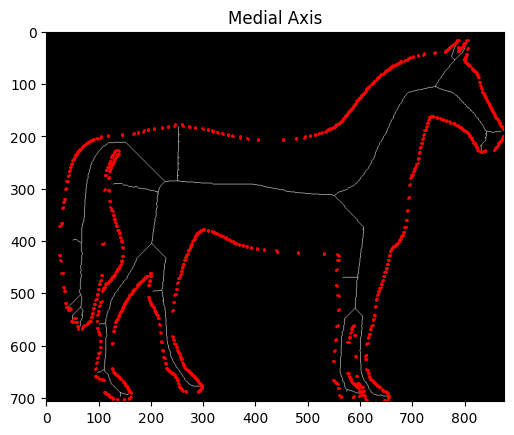

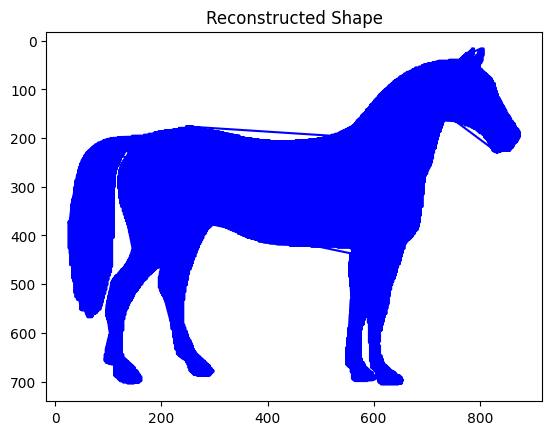

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.draw import polygon

# خواندن نقاط از فایل
def read_points(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split(','))
            points.append((x, y))
    return np.array(points)

# تولید تصویر باینری از نقاط
def create_binary_image(points, img_size):
    img = np.zeros(img_size, dtype=np.uint8)
    rr, cc = polygon(points[:, 1], points[:, 0])
    img[rr, cc] = 1
    return img

# محاسبه محور میانی
def compute_medial_axis(binary_image):
    skeleton = skeletonize(binary_image)
    return skeleton

# پیدا کردن مرزها
def find_contours(binary_image):
    contours = []
    visited = np.zeros_like(binary_image, dtype=bool)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    def is_border(x, y):
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx < 0 or nx >= binary_image.shape[0] or ny < 0 or ny >= binary_image.shape[1]:
                continue
            if binary_image[nx, ny] == 0:
                return True
        return False
    
    for i in range(1, binary_image.shape[0] - 1):
        for j in range(1, binary_image.shape[1] - 1):
            if binary_image[i, j] == 1 and is_border(i, j) and not visited[i, j]:
                contour = []
                stack = [(i, j)]
                while stack:
                    x, y = stack.pop()
                    if visited[x, y]:
                        continue
                    visited[x, y] = True
                    contour.append((x, y))
                    for dx, dy in directions:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < binary_image.shape[0] and 0 <= ny < binary_image.shape[1]:
                            if binary_image[nx, ny] == 1 and not visited[nx, ny]:
                                stack.append((nx, ny))
                contours.append(contour)
    return contours

# نمایش گرافیکی محور میانی
def plot_medial_axis(points, medial_axis):
    plt.figure()
    plt.imshow(medial_axis, cmap='gray')
    plt.scatter(points[:, 0], points[:, 1], c='red', s=1)
    plt.title('Medial Axis')
    plt.show()

# بازسازی شکل بر اساس مرزها
def reconstruct_shape(contours):
    plt.figure()
    for contour in contours:
        contour = np.array(contour)
        plt.plot(contour[:, 1], contour[:, 0], 'b-')
    plt.title('Reconstructed Shape')
    plt.gca().invert_yaxis()
    plt.show()

# مسیر فایل ورودی
file_path = 'horse-2D.txt'  # فایل خود را اینجا قرار دهید

# خواندن نقاط
points = read_points(file_path)

# اندازه تصویر
img_size = (int(points[:, 1].max()) + 1, int(points[:, 0].max()) + 1)

# تولید تصویر باینری
binary_image = create_binary_image(points, img_size)

# محاسبه محور میانی
medial_axis = compute_medial_axis(binary_image)

# پیدا کردن مرزها
contours = find_contours(binary_image)

# نمایش گرافیکی محور میانی
plot_medial_axis(points, medial_axis)

# بازسازی شکل
reconstruct_shape(contours)


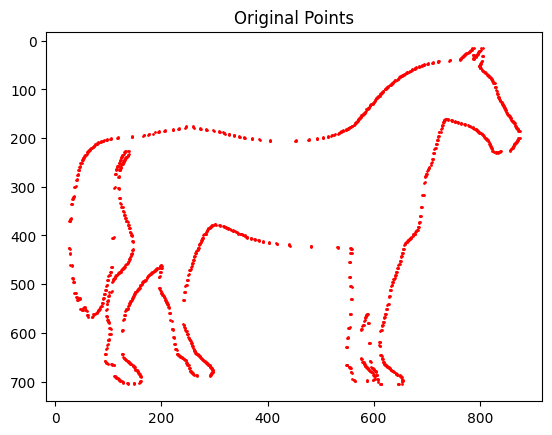

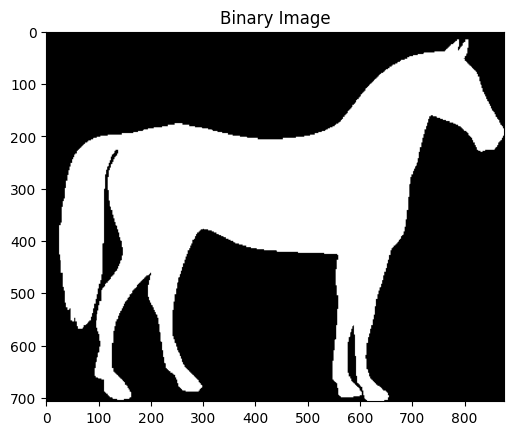

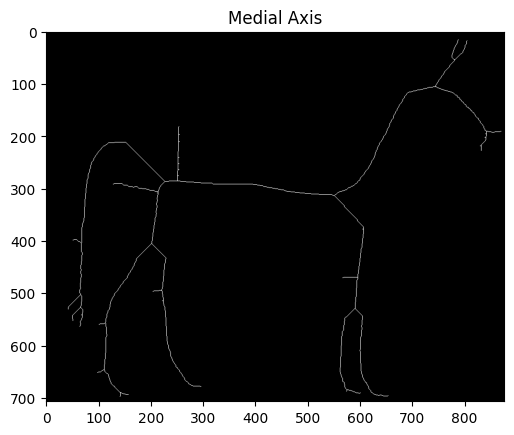

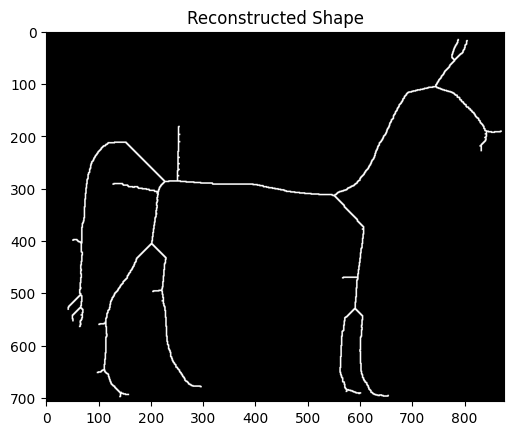

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, dilation
from skimage.draw import polygon
from scipy.ndimage import binary_fill_holes

# خواندن نقاط از فایل
def read_points(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split(','))
            points.append((x, y))
    return np.array(points)

# تولید تصویر باینری از نقاط
def create_binary_image(points, img_size):
    img = np.zeros(img_size, dtype=np.uint8)
    rr, cc = polygon(points[:, 1], points[:, 0])
    img[rr, cc] = 1
    return img

# محاسبه محور میانی
def compute_medial_axis(binary_image):
    skeleton = skeletonize(binary_image)
    return skeleton

# بازسازی شکل از محور میانی
def reconstruct_shape_from_medial_axis(medial_axis):
    dilated_image = dilation(medial_axis, footprint=np.ones((3, 3)))
    filled_image = binary_fill_holes(dilated_image)
    return filled_image

# نمایش نقاط اصلی
def plot_original_points(points):
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1], c='red', s=1)
    plt.title('Original Points')
    plt.gca().invert_yaxis()
    plt.show()

# نمایش تصویر باینری
def plot_binary_image(binary_image):
    plt.figure()
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.show()

# نمایش محور میانی
def plot_medial_axis(medial_axis):
    plt.figure()
    plt.imshow(medial_axis, cmap='gray')
    plt.title('Medial Axis')
    plt.show()

# نمایش شکل بازسازی شده
def plot_reconstructed_shape(reconstructed_shape):
    plt.figure()
    plt.imshow(reconstructed_shape, cmap='gray')
    plt.title('Reconstructed Shape')
    plt.show()

# مسیر فایل ورودی
file_path = 'horse-2D.txt'  # فایل خود را اینجا قرار دهید

# خواندن نقاط
points = read_points(file_path)

# اندازه تصویر
img_size = (int(points[:, 1].max()) + 1, int(points[:, 0].max()) + 1)

# نمایش نقاط اصلی
plot_original_points(points)

# تولید تصویر باینری
binary_image = create_binary_image(points, img_size)

# نمایش تصویر باینری
plot_binary_image(binary_image)

# محاسبه محور میانی
medial_axis = compute_medial_axis(binary_image)

# نمایش محور میانی
plot_medial_axis(medial_axis)

# بازسازی شکل از محور میانی
reconstructed_shape = reconstruct_shape_from_medial_axis(medial_axis)

# نمایش شکل بازسازی شده
plot_reconstructed_shape(reconstructed_shape)


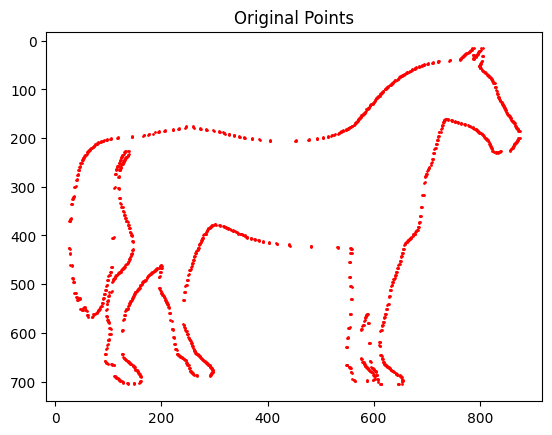

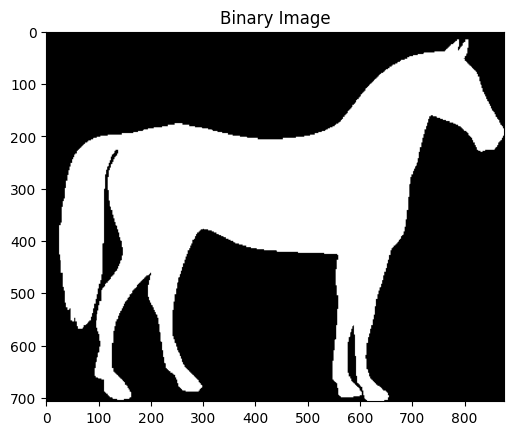

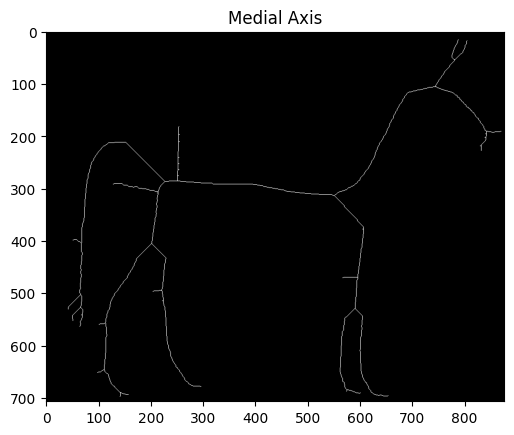

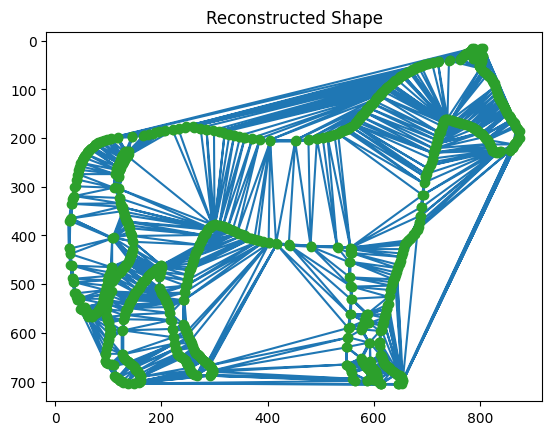

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from skimage.morphology import skeletonize
from skimage.draw import polygon

# خواندن نقاط از فایل
def read_points(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            x, y = map(float, line.strip().split(','))
            points.append((x, y))
    return np.array(points)

# تولید تصویر باینری از نقاط
def create_binary_image(points, img_size):
    img = np.zeros(img_size, dtype=np.uint8)
    rr, cc = polygon(points[:, 1], points[:, 0])
    img[rr, cc] = 1
    return img

# محاسبه محور میانی
def compute_medial_axis(binary_image):
    skeleton = skeletonize(binary_image)
    return skeleton

# بازسازی شکل با مثلث‌بندی دلونی
def reconstruct_shape_with_delaunay(points):
    tri = Delaunay(points)
    return tri

# نمایش نقاط اصلی
def plot_original_points(points):
    plt.figure()
    plt.scatter(points[:, 0], points[:, 1], c='red', s=1)
    plt.title('Original Points')
    plt.gca().invert_yaxis()
    plt.show()

# نمایش تصویر باینری
def plot_binary_image(binary_image):
    plt.figure()
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.show()

# نمایش محور میانی
def plot_medial_axis(medial_axis):
    plt.figure()
    plt.imshow(medial_axis, cmap='gray')
    plt.title('Medial Axis')
    plt.show()

# نمایش شکل بازسازی شده
def plot_reconstructed_shape(points, tri):
    plt.figure()
    plt.triplot(points[:, 0], points[:, 1], tri.simplices)
    plt.plot(points[:, 0], points[:, 1], 'o')
    plt.gca().invert_yaxis()
    plt.title('Reconstructed Shape')
    plt.show()

# مسیر فایل ورودی
file_path = 'horse-2D.txt'  # فایل خود را اینجا قرار دهید

# خواندن نقاط
points = read_points(file_path)

# اندازه تصویر
img_size = (int(points[:, 1].max()) + 1, int(points[:, 0].max()) + 1)

# نمایش نقاط اصلی
plot_original_points(points)

# تولید تصویر باینری
binary_image = create_binary_image(points, img_size)

# نمایش تصویر باینری
plot_binary_image(binary_image)

# محاسبه محور میانی
medial_axis = compute_medial_axis(binary_image)

# نمایش محور میانی
plot_medial_axis(medial_axis)

# بازسازی شکل با مثلث‌بندی دلونی
tri = reconstruct_shape_with_delaunay(points)

# نمایش شکل بازسازی شده
plot_reconstructed_shape(points, tri)
